In [2]:
from simplec import Simulation
import pandas

In [8]:
class ExampleModel():
    inputs = ['value_in']
    outputs = ['value_out']
    delta_t = 60 # s

    def __init__(self, name, func):
        self.name = name
        self.func = func
        # init parameters here

    def step(self, time, value_in) -> dict:
        # model logic here
        value_out = self.func(value_in)
        return {'value_out': value_out}
    
class ExampleModelMultiinput():
    inputs = ['value_in_']
    outputs = ['value_out']
    delta_t = 60 # s

    def __init__(self, name):
        self.name = name
        # init parameters here

    def step(self, time, value_in_) -> dict:
        # value_in_ is a list here!
        value_out = sum(value_in_)
        return {'value_out': value_out}

In [13]:
sim = Simulation()

model1a   = ExampleModel('example_1a', lambda x: x+1)
model1b   = ExampleModel('example_1b', lambda x: -x)
model2   = ExampleModelMultiinput('example_2')

sim.add_model(model1a, watch_values=['value_in', 'value_out'])
sim.add_model(model1b, watch_values=['value_in', 'value_out'])
sim.add_model(model2, watch_values=['value_out'])

sim.connect(model1a, model2, ('value_out', 'value_in_'))
sim.connect(model1b, model2, ('value_out', 'value_in_'))
sim.connect(model2, model1a, ('value_out', 'value_in'), time_shifted=True, init_values={'value_out': 1})
sim.connect(model2, model1b, ('value_out', 'value_in'), time_shifted=True, init_values={'value_out': 1})

times = pandas.date_range('2021-01-01 00:00:00', '2021-01-02 00:00:00', freq='1min', tz='UTC+01:00')

sim.run(times)

Progress: 100%|██████████| 1441/1441 [00:02<00:00, 664.77Steps/s]


In [14]:
sim.df

model                     example_1a           example_1b           example_2
i/o                           inputs   outputs     inputs   outputs   outputs
attribute                   value_in value_out   value_in value_out value_out
2021-01-01 00:00:00+01:00          1         2          1        -1         1
2021-01-01 00:01:00+01:00          1         2          1        -1         1
2021-01-01 00:02:00+01:00          1         2          1        -1         1
2021-01-01 00:03:00+01:00          1         2          1        -1         1
2021-01-01 00:04:00+01:00          1         2          1        -1         1
...                              ...       ...        ...       ...       ...
2021-01-01 23:56:00+01:00          1         2          1        -1         1
2021-01-01 23:57:00+01:00          1         2          1        -1         1
2021-01-01 23:58:00+01:00          1         2          1        -1         1
2021-01-01 23:59:00+01:00          1         2          1        -1         1
2021-01-02 00:00:00+01:00          1         2          1        -1         1

[1441 rows x 5 columns]

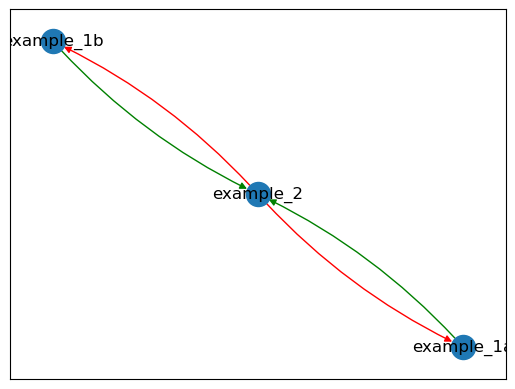

In [6]:
sim.draw_exec_graph()